$\large{\textbf{Лекция 4. Реализация алгоритма Гровера. Два кубита}}$

$ \textbf{Постановка задачи} $

$ \textbf{Общая характеристика} $

\begin{equation}\label{Eqn:7-1}
f:\{0,1\}^n\mapsto \{0,1\} \,.
\end{equation}

\begin{equation}\label{Eqn:7-2}
f(x=x_0)=1;\,f(x\neq x_0)=0 \,.
\end{equation}

$ \textbf{Кодирование ответа на запрос} $

\begin{equation}\label{Eqn:7-3}
|x\rangle\,\stackrel{U_f}\mapsto \,{(-1)^{f(x)}\,|x\rangle}\,.
\end{equation}

$ \textbf{Инверсия} $

\begin{equation}\label{Eqn:7-4}
U_P=HPH=H(2|0\rangle\langle0|-I)H
\end{equation}

$ \textbf{Квантовая схема алгоритма Гровера} $

\begin{equation}\label{Eqn:7-5}
U_{tot}=(I^{\otimes n}\otimes HPH )(c-U_f)(HX)\otimes H^{\otimes n}\,.
\end{equation}

\begin{equation}\label{Eqn:7-6}
a_x \rightarrow (-a_{x_0})\rightarrow <a>=\frac{1}{2^n}\sum_{x=0}^{2^n-1}a_x\rightarrow a'_x=2<a>-a_x \,.
\end{equation}

In [1]:
%matplotlib inline
from qiskit import *
from qiskit.visualization import plot_histogram

# 1.Алгоритм Гровера – алгоритм поиска 
# Помеченный элемента  искомое в неупорядоченной/неструктурированной базе данных.

In [2]:
N1 = '10'
num_qubits = len(N1)
qc = QuantumCircuit(num_qubits)

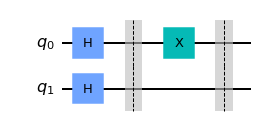

In [3]:
qc.h(range(num_qubits))
qc.barrier()
N1 = N1[::-1]
for idx in range(num_qubits):
    if N1[idx] == '0':
        qc.x(idx)
qc.barrier()
qc.draw('mpl')

backend = Aer.get_backend('statevector_simulator')
current_state = execute(qc,backend).result().get_statevector()
print(current_state) 

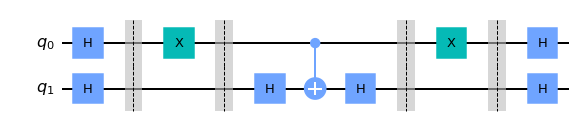

In [4]:
qc.h(1)
qc.cx(0, 1)
qc.h(1)
qc.barrier()
for idx in range(num_qubits):
    if N1[idx] == '0':
        qc.x(idx)
qc.barrier()
qc.h(0)
qc.h(1)
qc.draw('mpl')

In [5]:
backend = Aer.get_backend('statevector_simulator')
current_state = execute(qc, backend).result().get_statevector()
print(current_state)

[ 0.5-6.1232340e-17j -0.5+1.8369702e-16j  0.5-6.1232340e-17j
  0.5-1.8369702e-16j]


<img src="QC_Fig4_1.png" />

#qc.x(0)
#qc.x(1)

$ |00\rangle \rightarrow |00 \rangle$

$ |01\rangle \rightarrow |01 \rangle$

$ |10\rangle \rightarrow |10 \rangle$

$ |11\rangle \rightarrow -|11 \rangle$

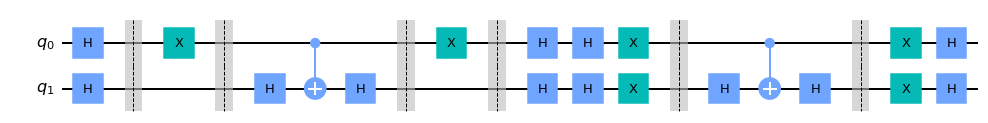

In [6]:
qc.h(range(num_qubits))
qc.x(range(num_qubits))
qc.barrier()
qc.h(1)
qc.cx(0, 1)
qc.h(1)
qc.barrier()
qc.x(range(num_qubits))
qc.h(range(num_qubits))
qc.draw('mpl')

<img src="QC_Fig4_2.png" />

$ 2|00\rangle \rightarrow |00 \rangle - |01 \rangle - |10 \rangle - |11 \rangle$

$ 2|01\rangle \rightarrow -|00 \rangle + |01 \rangle - |10 \rangle - |11 \rangle$

$ 2|10\rangle \rightarrow -|00 \rangle - |01 \rangle + |10 \rangle - |11 \rangle$

$ 2|11\rangle \rightarrow -|00 \rangle - |01 \rangle - |10 \rangle + |11 \rangle$

# 2. Алгоритма Гровера поиск элемента производится в 2 шага:

## a – маркировка кубита:
## мы заставляем наш кубит перейти в состояние $|11\rangle$, потому что, прогнав это его через квантовую схему мы изменяем знак у этого состояния, пометив нужный нам элемент знаком "-". 
## После этого возвращаем элемент к изначальному значению.
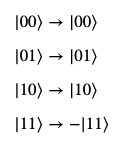


## б – усиление амплитуды: 
## Прогоняя кубиты через новую кантовую схему, мы в итоге примением новую схему и кубиты меняют свой вид:

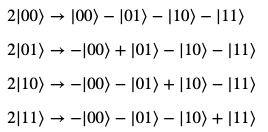

## Все кроме искомого - помеченного элемента меняют знак так, что в итоге сократятся, в то время как искомый элемент будет иметь противоположный знак, относительно всех остальных - у него единственного будет знак "-"

## Как пример в данной ноутбуке для $|10\rangle$ имеем:
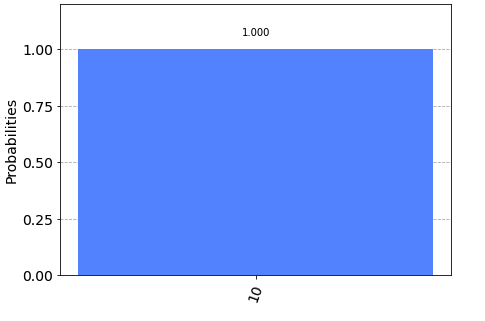



In [7]:
backend = Aer.get_backend('statevector_simulator')
current_state = execute(qc, backend).result().get_statevector()
print(current_state)

[-7.85046229e-17+6.12323400e-17j -1.00000000e+00-1.83697020e-16j
  1.57009246e-16+1.23259516e-32j  1.11022302e-16-1.84889275e-32j]


# 3. Квантовая схема маркировки состояния для двух кубитов
## кубит перегонют в состояние $|11\rangle$,
## меняют знак состояния $|11\rangle$
## возвращая в конце кубит в свое изначальное состояние, НО уже со другим знаком("-").

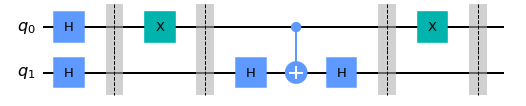

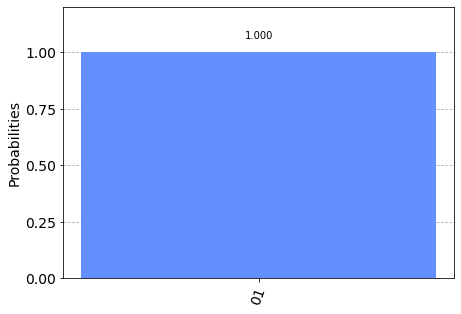

In [8]:
qc.measure_all()
backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend=backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)

# 4. Квантовая схема усиления амплитуды маркированного состояния для случая двух кубит.
## По прохождению данной схемы все состояния, кроме искомого сокращаются. 
## Искомое останется единственным состоянием у которого все знаки отрицательны.

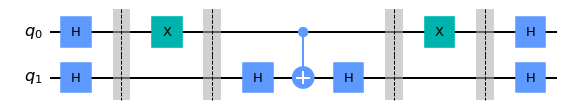


# Итоговая схема Алгоритма Гровера:


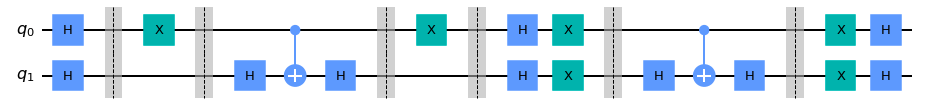